# SUPPORT VECTOR MACHINE

# 1. Suppot Vector Classifier implementation

In [36]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix

In [10]:
#Lets create synthesis data points
from sklearn.datasets import make_classification

In [14]:
X,y=make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=2,n_redundant=0)

In [16]:
print(X)

[[-0.10422499  1.52167183]
 [ 0.29088324 -0.60951926]
 [-0.07763619  1.15130692]
 ...
 [ 1.76233225  0.62078743]
 [-2.2200798   0.33276076]
 [ 1.46272831  1.06022781]]


In [17]:
pd.DataFrame(X)[0] #count no of 

0     -0.104225
1      0.290883
2     -0.077636
3     -0.251697
4      1.035371
         ...   
995    0.550895
996    0.672248
997    1.762332
998   -2.220080
999    1.462728
Name: 0, Length: 1000, dtype: float64

In [18]:
pd.DataFrame(y)[0]

0      1
1      0
2      1
3      0
4      0
      ..
995    1
996    0
997    1
998    1
999    1
Name: 0, Length: 1000, dtype: int32

In [22]:
# sns.scatterplot(pd.DataFrame(X)[0],pd.DataFrame(X)[1],hue=y)

<Axes: xlabel='X1', ylabel='X2'>

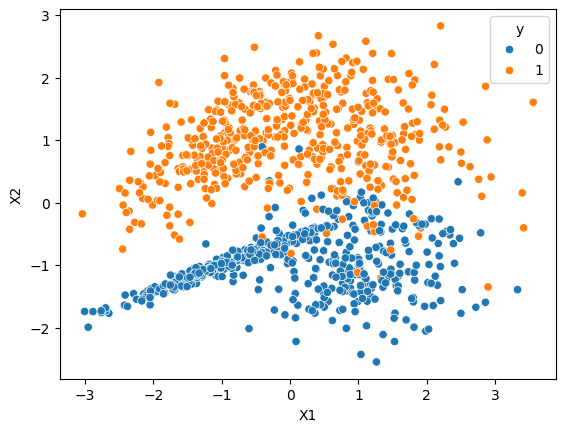

In [25]:
df=pd.DataFrame(X,columns=["X1","X2"])
df["y"]=y
sns.scatterplot(x="X1",y="X2",hue="y",data=df)

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

# kernek=Linear

In [28]:
from sklearn.svm import SVC
svc=SVC(kernel="linear")
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [33]:
#coeffcient works only for linear not for other than that
svc.coef_

array([[-0.32843036,  2.65386814]])

In [32]:
#prediction
y_pred=svc.predict(X_test)

In [37]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       122
           1       0.97      0.96      0.96       128

    accuracy                           0.96       250
   macro avg       0.96      0.96      0.96       250
weighted avg       0.96      0.96      0.96       250

[[118   4]
 [  5 123]]


# Kernel RBF

In [38]:
rbf=SVC(kernel='rbf')

In [39]:
rbf.fit(X_train,y_train)

SVC()

In [40]:
y_pred1=rbf.predict(X_test)

In [42]:
print(classification_report(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       122
           1       0.98      0.96      0.97       128

    accuracy                           0.97       250
   macro avg       0.97      0.97      0.97       250
weighted avg       0.97      0.97      0.97       250

[[119   3]
 [  5 123]]


In [43]:
# kernel=polynomial

In [51]:
ploy=SVC(kernel='poly')

In [52]:
ploy.fit(X_train,y_train)

SVC(kernel='poly')

In [53]:
y_pred4=rbf.predict(X_test)

In [54]:
print(classification_report(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       122
           1       0.98      0.96      0.97       128

    accuracy                           0.97       250
   macro avg       0.97      0.97      0.97       250
weighted avg       0.97      0.97      0.97       250

[[119   3]
 [  5 123]]


# kernel=sigmoid

In [44]:
sigmoid=SVC(kernel='sigmoid')


In [45]:
sigmoid.fit(X_train,y_train)

SVC(kernel='sigmoid')

In [46]:
y_pred2=rbf.predict(X_test)

In [47]:
print(classification_report(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       122
           1       0.98      0.96      0.97       128

    accuracy                           0.97       250
   macro avg       0.97      0.97      0.97       250
weighted avg       0.97      0.97      0.97       250

[[119   3]
 [  5 123]]


# Hyper parameter turing with svc

In [57]:
from sklearn.model_selection import GridSearchCV
param_grid ={ 'C' :[0.1,1,10,100,1000],
             'gamma' :[1,0,1,0.01,0.001,0.0001],
             'kernel' :['rbf'] }


In [58]:
grid=GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [59]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.960 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.993 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.953 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.953 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.967 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=0, kernel=rbf;, score=0.507 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=0, kernel=rbf;, score=0.507 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=0, kernel=rbf;, score=0.507 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=0, kernel=rbf;, score=0.500 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=0, kernel=rbf;, score=0.500 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.960 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0, 1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [60]:
grid.best_params_

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}

In [62]:
#prediction
y_pred5=grid.predict(X_test)
print(classification_report(y_test,y_pred5))
print(confusion_matrix(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       122
           1       0.98      0.95      0.96       128

    accuracy                           0.96       250
   macro avg       0.96      0.96      0.96       250
weighted avg       0.96      0.96      0.96       250

[[119   3]
 [  6 122]]


In [ ]:
# 